In [1]:

import pandas as pd
import numpy as np

url = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [2]:
df_sorted = df.loc[(df['Identification.Make']=='Honda') & (df['Fuel Information.Fuel Type']=='Gasoline')]
df_sorted.reset_index()


,index,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
1,102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
2,103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
3,104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
4,105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
194,5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
195,5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
196,5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [3]:
from sklearn import preprocessing
reduced_df = df_sorted[['Engine Information.Engine Statistics.Horsepower', 'Fuel Information.Highway mpg']]
quantile = reduced_df['Engine Information.Engine Statistics.Horsepower'] < reduced_df['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)
df1 = reduced_df[quantile]

scaler = preprocessing.MinMaxScaler()
names = reduced_df.columns
d = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

,Engine Information.Engine Statistics.Horsepower,Fuel Information.Highway mpg
0,0.548872,0.523810
1,0.548872,0.523810
2,0.548872,0.523810
3,0.548872,0.523810
4,0.548872,0.523810
...,...,...
172,1.000000,0.238095
173,1.000000,0.190476
174,1.000000,0.238095
175,1.000000,0.190476


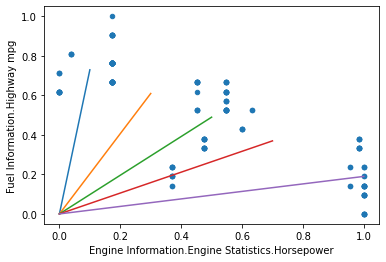

In [4]:

import matplotlib.pyplot as plt
y1 = 0.7290315212700313 
y2 = 0.6091886831018399 
y3 = 0.4893458449336485 
y4 = 0.36950300676545716 
y5 = 0.18973874951317005 
scaled_df.plot.scatter(x=0,y=1)
plt.plot([0, 0.1], [0, y1])
plt.plot([0, 0.3], [0, y2])
plt.plot([0, 0.5], [0, y3])
plt.plot([0, 0.7], [0, y4])
plt.plot([0, 1], [0, y5])

In [5]:
import sklearn.linear_model
ys = scaled_df['Fuel Information.Highway mpg']
xs = scaled_df['Engine Information.Engine Statistics.Horsepower']
xs_reshape = np.array(xs).reshape(-1, 1)

print(xs.shape)
print(xs_reshape.shape)
print(xs_reshape)

(177,)
(177, 1)
[[0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.45112782]
 [0.45112782]
 [0.45112782]
 [0.45112782]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.45112782]
 [0.45112782]
 [0.45112782]
 [0.45112782]
 [0.54887218]
 [0.54887218]
 [0.54887218]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.60150376]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.60150376]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.60150376]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.17293233]
 [0.60150376]
 [0.03759398]
 [0.03759398]
 [0.

In [9]:
model = sklearn.linear_model.LinearRegression(normalize=True)
model.fit(xs_reshape, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [8]:

model.coef_

array([-0.59921419])

In [10]:
predicted = model.predict(xs_reshape)
spending1 = model.predict([[0.1]])
spending2 = model.predict([[0.3]])
spending3 = model.predict([[0.5]])
spending4 = model.predict([[0.7]])
spending5 = model.predict([[1]])
print('if x = 0.1, y = {} '.format(spending1[0]))
print('if x = 0.3, y = {} '.format(spending2[0]))
print('if x = 0.5, y = {} '.format(spending3[0]))
print('if x = 0.7, y = {} '.format(spending4[0]))
print('if x = 1, y = {} '.format(spending5[0]))
predicted

if x = 0.1, y = 0.7290315212700313 
if x = 0.3, y = 0.6091886831018399 
if x = 0.5, y = 0.4893458449336485 
if x = 0.7, y = 0.36950300676545716 
if x = 1, y = 0.18973874951317005 


array([0.46006094, 0.46006094, 0.46006094, 0.46006094, 0.46006094,
       0.46006094, 0.46006094, 0.46006094, 0.46006094, 0.46006094,
       0.46006094, 0.51863075, 0.51863075, 0.51863075, 0.51863075,
       0.46006094, 0.46006094, 0.46006094, 0.46006094, 0.51863075,
       0.51863075, 0.51863075, 0.51863075, 0.46006094, 0.46006094,
       0.46006094, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.42852335, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.42852335, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.42852335, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.68532943, 0.68532943, 0.68532943,
       0.68532943, 0.68532943, 0.42852335, 0.76642609, 0.76642609,
       0.78895294, 0.78895294, 0.78895294, 0.78895294, 0.78895

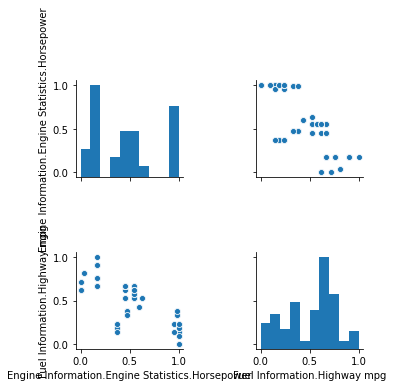

In [11]:

import seaborn as sb
sb.pairplot(scaled_df)

 [-0.59921419]


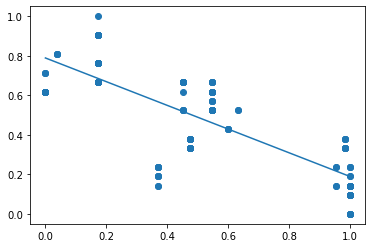

In [12]:
x = scaled_df['Engine Information.Engine Statistics.Horsepower']
y= scaled_df['Fuel Information.Highway mpg']
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 1)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
print('',model.coef_)